In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import zipfile ### zipfile is used to extract the zip file 
%matplotlib inline

In [5]:
#read the zipfolder
zf = zipfile.ZipFile(r"C:\Users\snjts\naming trends capstone project\names.zip")
zf


<zipfile.ZipFile filename='C:\\Users\\snjts\\naming trends capstone project\\names.zip' mode='r'>

In [6]:
#create an empty dataframe
df1=pd.DataFrame()


In [7]:
#retrieves the filenames from the zipfolder
filename=zf.namelist() 
#remove those file names that are not necessary
filename.remove("NationalReadMe.pdf")

#total number of filenames present in the list
length=len(filename) 

#modifies the empty dataframe according to the datapresent in the first file
df1=df1.append(pd.read_csv(zf.open(filename[0]),header=None)) 

#creates a column 'Year' and adds the year as present in the filename
df1=df1.assign(Year=filename[0][3:7]) 

#add data from the remaining files in the zip folder
#add the corressponding years to the data
for i in range(1,length):
    df1=df1.append(pd.read_csv(zf.open(filename[i]),header=None))
    df1.loc[:,'Year'].fillna(filename[i][3:7],inplace=True) 

In [8]:
#rename the the columns and save it in a new dataframe
Consolidated_names=df1 
Consolidated_names.rename(columns={0:'Names',1:'Sex',2:'Birth Counts'},inplace=True)
Consolidated_names

,Names,Sex,Birth Counts,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31949,Zyheem,M,5,2019
31950,Zykel,M,5,2019
31951,Zyking,M,5,2019
31952,Zyn,M,5,2019


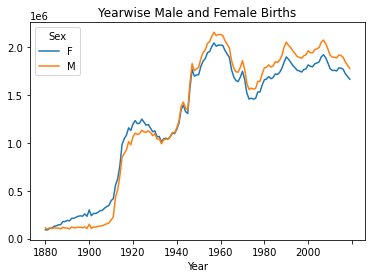

In [9]:
#create a pivot table to analyse total births in a particular year for each sex
a=Consolidated_names.pivot_table('Birth Counts',index='Year',columns='Sex',aggfunc=sum)
a.plot(title="Yearwise Male and Female Births")

In [10]:
#define a function to retrieve top 100 data based on the birth count
def get_top100(group):
    return group.sort_values(by='Birth Counts',ascending=False)[:100]   


In [11]:
#Retrieve the top 100 male birth counts
Top100_Male_Names=get_top100(Consolidated_names[Consolidated_names["Sex"]=='M'])
Top100_Male_Names

,Names,Sex,Birth Counts,Year
6103,James,M,94766,1947
7014,Michael,M,92726,1957
6104,Robert,M,91645,1947
6886,Michael,M,90662,1956
7024,Michael,M,90531,1958
...,...,...,...,...
7667,James,M,71328,1963
5245,Robert,M,70849,1944
7590,Robert,M,70195,1962
7809,Robert,M,70011,1964


In [12]:
#Retrieve the top 100 female birth counts
Top100_Female_Names=get_top100(Consolidated_names[Consolidated_names["Sex"]=='F'])
Top100_Female_Names

,Names,Sex,Birth Counts,Year
0,Linda,F,99690,1947
0,Linda,F,96213,1948
0,Linda,F,91019,1949
0,Linda,F,80433,1950
0,Mary,F,73985,1921
...,...,...,...,...
2,Linda,F,48072,1956
2,Patricia,F,47944,1950
0,Jessica,F,47887,1989
3,Deborah,F,47832,1956


In [13]:
Most_popular_Male_names=Top100_Male_Names.groupby(['Names']).sum().reset_index() 
print("The 5 most popular male names over the years:\n", Most_popular_Male_names.sort_values('Birth Counts',ascending=False).head())

The 5 most popular male names over the years:
      Names  Birth Counts
1    James       1879792
3  Michael       1839629
4   Robert       1748428
2     John       1596518
0    David       1049768


In [14]:
Most_popular_Female_names=Top100_Female_Names.groupby(['Names']).sum().reset_index() 
print("The 5 most popular female names over the years:\n", Most_popular_Female_names.sort_values('Birth Counts',ascending=False).head())

The 5 most popular female names over the years:
       Names  Birth Counts
8      Mary       2956630
4  Jennifer        813063
6     Linda        777148
7      Lisa        329466
9  Patricia        308932
